In [1]:
library(ggplot2)
library(GGally)
library(lme4)
library(lattice)

Loading required package: Matrix


In [2]:
path <- '/nfs/turbo/intmed-bnallamo-turbo/wsliu/Data/NRD/'

In [2]:
path <- '/nfs/turbo/umms-awaljee/wsliu/Data/NRD/'

In [3]:
train.df <- read.csv(file = paste0(path, 'cohorts30/ami/train0.csv'))
tst.df <- read.csv(file = paste0(path, 'cohorts30/ami/tst0.csv'))

In [4]:
comorbs <- c('CM_AIDS', 'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH', 'CM_BLDLOSS', 'CM_CHF', 'CM_CHRNLUNG', 'CM_COAG', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_DRUG', 'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_LYMPH', 'CM_LYTES', 'CM_METS', 'CM_NEURO', 'CM_OBESE', 'CM_PARA', 'CM_PERIVASC', 'CM_PSYCH', 'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE', 'CM_WGHTLOSS')

In [5]:
train.df$HOSP_NRD <- as.factor(train.df$HOSP_NRD)
tst.df$HOSP_NRD <- as.factor(tst.df$HOSP_NRD)

train.df$FEMALE <- as.factor(train.df$FEMALE)
tst.df$FEMALE <- as.factor(tst.df$FEMALE)
for(c in comorbs){
    train.df[ , c] <- as.factor(train.df[ , c])
    tst.df[ , c] <- as.factor(tst.df[ , c])
}

age.mean <- mean(train.df$AGE)
age.std <- sd(train.df$AGE)

train.df$AGE <- (train.df$AGE - age.mean)/age.std
tst.df$AGE <- (tst.df$AGE - age.mean)/age.std

train.df$readm30 <- as.numeric(train.df$readm30) - 1
tst.df$readm30 <- as.numeric(tst.df$readm30) - 1

In [9]:
head(train.df)

AGE,AWEEKEND,DIED,DISCWT,DISPUNIFORM,DMONTH,DQTR,DRG,DRGVER,DRG_NoPOA,⋯,CM_OBESE,CM_PARA,CM_PERIVASC,CM_PSYCH,CM_PULMCIRC,CM_RENLFAIL,CM_TUMOR,CM_ULCER,CM_VALVE,CM_WGHTLOSS
63,0,0,1.505411,1,11,4,247,32,247,⋯,0,0,0,0,0,0,0,0,0,0
84,0,0,2.359884,5,2,1,280,31,280,⋯,0,0,0,0,0,0,0,0,0,0
57,1,0,1.945870,6,5,2,280,31,280,⋯,1,0,0,0,0,1,0,0,0,0
55,0,0,3.319084,5,7,3,280,31,280,⋯,0,0,0,0,0,0,0,0,0,0
74,0,0,2.312238,1,2,1,247,31,247,⋯,0,0,0,0,0,0,0,0,0,0
61,1,0,1.962384,1,3,1,247,31,247,⋯,0,0,0,0,0,0,0,0,0,0


In [7]:
dim(train.df)
dim(tst.df)

[1] 164280    183

[1] 18689   183

In [8]:
result <- glmer(readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS + CM_CHF + CM_CHRNLUNG + CM_COAG + 
                CM_DEPRESS + CM_DM + CM_DMCX + CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES + CM_METS + 
                CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH + CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + 
                CM_VALVE + CM_WGHTLOSS + AGE + FEMALE + (1|HOSP_NRD), data = train.df, family = binomial, 
                control = glmerControl(optimizer = "nloptwrap", calc.derivs = FALSE), nAGQ=7)

In [68]:
result <- glmer(readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS + CM_CHF + CM_CHRNLUNG + CM_COAG + 
                CM_DEPRESS + CM_DM + CM_DMCX + CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES + CM_METS + 
                CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH + CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + 
                CM_VALVE + CM_WGHTLOSS + AGE + FEMALE + (1|HOSP_NRD), data = train.df, family = binomial, 
               control = glmerControl(optimizer = "bobyqa", calc.derivs = FALSE, optCtrl=list(maxfun=2e5)))

In [69]:
derivs1 <- result@optinfo$derivs
sc_grad1 <- with(derivs1,solve(Hessian,gradient))
max(abs(sc_grad1))

ERROR: Error in solve(Hessian, gradient): object 'Hessian' not found


In [56]:
max(pmin(abs(sc_grad1),abs(derivs1$gradient)))

[1] 0.02047999

In [9]:
summary(result)


Correlation matrix not shown by default, as p = 32 > 12.
Use print(obj, correlation=TRUE)  or
	 vcov(obj)	 if you need it



Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 7) [glmerMod]
 Family: binomial  ( logit )
Formula: readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS +  
    CM_CHF + CM_CHRNLUNG + CM_COAG + CM_DEPRESS + CM_DM + CM_DMCX +  
    CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES +  
    CM_METS + CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH +  
    CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + CM_VALVE +  
    CM_WGHTLOSS + AGE + FEMALE + (1 | HOSP_NRD)
   Data: train.df
Control: glmerControl(optimizer = "nloptwrap", calc.derivs = FALSE)

     AIC      BIC   logLik deviance df.resid 
115765.6 116095.9 -57849.8 115699.6   164247 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4672 -0.3950 -0.3096 -0.2504  5.9572 

Random effects:
 Groups   Name        Variance Std.Dev.
 HOSP_NRD (Intercept) 0.0427   0.2066  
Number of obs: 164280, groups:  HOSP_NRD, 874

Fixed effects:
    

In [72]:
summary(result)


Correlation matrix not shown by default, as p = 32 > 12.
Use print(obj, correlation=TRUE)  or
	 vcov(obj)	 if you need it



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS +  
    CM_CHF + CM_CHRNLUNG + CM_COAG + CM_DEPRESS + CM_DM + CM_DMCX +  
    CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES +  
    CM_METS + CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH +  
    CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + CM_VALVE +  
    CM_WGHTLOSS + AGE + FEMALE + (1 | HOSP_NRD)
   Data: train.df
Control: glmerControl(optimizer = "nloptwrap", calc.derivs = FALSE)

     AIC      BIC   logLik deviance df.resid 
115765.7 116096.0 -57849.9 115699.7   164247 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4679 -0.3950 -0.3096 -0.2504  5.9564 

Random effects:
 Groups   Name        Variance Std.Dev.
 HOSP_NRD (Intercept) 0.04265  0.2065  
Number of obs: 164280, groups:  HOSP_NRD, 874

Fixed effects:
              Estimate Std

In [58]:
rf <- ranef(result, condVar = TRUE)

In [12]:
postVar = attr(rf$HOSP_NRD, 'postVar')

$HOSP_NRD


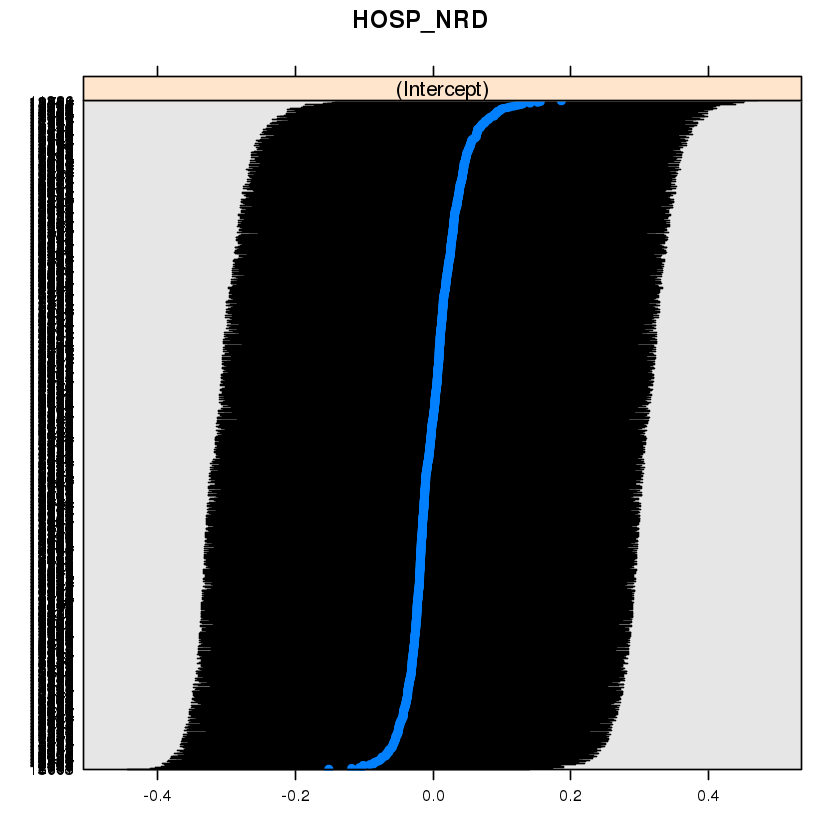

In [59]:
dotplot(rf)

In [65]:
VarCorr(result)

 Groups   Name        Std.Dev.
 HOSP_NRD (Intercept) 0.30138 

In [50]:
write.csv(coef(result)$HOSP_NRD[ ,c('(Intercept)', 'AGE')], file = paste0(path, 'cohorts/', cohort, '/intercepts0.csv'))

In [10]:
pred_score <- predict(result, newdata = tst.df, type = 'response')

In [11]:
pred_test <- data.frame(y_pred = pred_score, y_true = tst.df$readm30)

In [15]:
write.csv(pred_test, file = paste0(path, 'cohorts30/ami/prediction_MELR0.csv'))

In [33]:
# results for nAGQ=10
summary(result)


Correlation matrix not shown by default, as p = 32 > 12.
Use print(obj, correlation=TRUE)  or
	 vcov(obj)	 if you need it



Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 10) [glmerMod]
 Family: binomial  ( logit )
Formula: readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS +  
    CM_CHF + CM_CHRNLUNG + CM_COAG + CM_DEPRESS + CM_DM + CM_DMCX +  
    CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES +  
    CM_METS + CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH +  
    CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + CM_VALVE +  
    CM_WGHTLOSS + AGE + FEMALE + (1 | HOSP_NRD)
   Data: train.df
Control: glmerControl(optimizer = "nloptwrap", calc.derivs = FALSE)

     AIC      BIC   logLik deviance df.resid 
119149.3 119480.4 -59541.7 119083.3   167929 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3811 -0.3977 -0.3123 -0.2526  5.9033 

Random effects:
 Groups   Name        Variance Std.Dev.
 HOSP_NRD (Intercept) 0.04143  0.2035  
Number of obs: 167962, groups:  HOSP_NRD, 1107

Fixed effects:
  

In [10]:
# results for nAGQ=2
print(result, corr=False)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 2) [glmerMod]
 Family: binomial  ( logit )
Formula: readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS +  
    CM_CHF + CM_CHRNLUNG + CM_COAG + CM_DEPRESS + CM_DM + CM_DMCX +  
    CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES +  
    CM_METS + CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH +  
    CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + CM_VALVE +  
    CM_WGHTLOSS + AGE + FEMALE + (1 | HOSP_NRD)
   Data: train.df
      AIC       BIC    logLik  deviance  df.resid 
115035.08 115365.26 -57484.54 114969.08    163638 
Random effects:
 Groups   Name        Std.Dev.
 HOSP_NRD (Intercept) 0.2044  
Number of obs: 163671, groups:  HOSP_NRD, 869
Fixed Effects:
 (Intercept)      CM_AIDS1   CM_ALCOHOL1   CM_ANEMDEF1      CM_ARTH1  
    -3.69359       0.11732       0.05313       0.30028       0.15956  
 CM_BLDLOSS1       CM_CHF1  CM_CHRNLUNG1   

In [21]:
# results for nAGQ=1
summary(result)


Correlation matrix not shown by default, as p = 32 > 12.
Use print(obj, correlation=TRUE)  or
	 vcov(obj)	 if you need it



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS +  
    CM_CHF + CM_CHRNLUNG + CM_COAG + CM_DEPRESS + CM_DM + CM_DMCX +  
    CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES +  
    CM_METS + CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH +  
    CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + CM_VALVE +  
    CM_WGHTLOSS + AGE + FEMALE + (1 | HOSP_NRD)
   Data: train.df
Control: glmerControl(optimizer = "nloptwrap", calc.derivs = FALSE)

     AIC      BIC   logLik deviance df.resid 
119149.4 119480.5 -59541.7 119083.4   167929 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3811 -0.3977 -0.3122 -0.2526  5.9023 

Random effects:
 Groups   Name        Variance Std.Dev.
 HOSP_NRD (Intercept) 0.04134  0.2033  
Number of obs: 167962, groups:  HOSP_NRD, 1107

Fixed effects:
              Estimate St

In [23]:
# results for nAGQ=0
summary(result)


Correlation matrix not shown by default, as p = 32 > 12.
Use print(obj, correlation=TRUE)  or
	 vcov(obj)	 if you need it



Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS +  
    CM_CHF + CM_CHRNLUNG + CM_COAG + CM_DEPRESS + CM_DM + CM_DMCX +  
    CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES +  
    CM_METS + CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH +  
    CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + CM_VALVE +  
    CM_WGHTLOSS + AGE + FEMALE + (1 | HOSP_NRD)
   Data: train.df
Control: glmerControl(optimizer = "nloptwrap", calc.derivs = FALSE)

     AIC      BIC   logLik deviance df.resid 
119150.0 119481.1 -59542.0 119084.0   167929 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3796 -0.3984 -0.3131 -0.2533  5.8816 

Random effects:
 Groups   Name        Variance Std.Dev.
 HOSP_NRD (Intercept) 0.04115  0.2028  
Number of obs: 167962, groups:  HOSP_NRD, 1107

Fixed effects:
   

## Cross Validation

In [3]:
comorbs <- c('CM_AIDS', 'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH', 'CM_BLDLOSS', 'CM_CHF', 'CM_CHRNLUNG', 'CM_COAG', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_DRUG', 'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_LYMPH', 'CM_LYTES', 'CM_METS', 'CM_NEURO', 'CM_OBESE', 'CM_PARA', 'CM_PERIVASC', 'CM_PSYCH', 'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE', 'CM_WGHTLOSS')

In [17]:
cohort = 'ami'

In [18]:
for (tst_fold in 0:9){
    train.df <- read.csv(file = paste0(path, 'cohorts30/', cohort, '/train', tst_fold, '.csv'))
    tst.df <- read.csv(file = paste0(path, 'cohorts/', cohort, '/tst', tst_fold, '.csv'))

    train.df$HOSP_NRD <- as.factor(train.df$HOSP_NRD)
    tst.df$HOSP_NRD <- as.factor(tst.df$HOSP_NRD)

    train.df$FEMALE <- as.factor(train.df$FEMALE)
    tst.df$FEMALE <- as.factor(tst.df$FEMALE)
    for(c in comorbs){
        train.df[ , c] <- as.factor(train.df[ , c])
        tst.df[ , c] <- as.factor(tst.df[ , c])
    }

    age.mean <- mean(train.df$AGE)
    age.std <- sd(train.df$AGE)
    train.df$AGE <- (train.df$AGE - age.mean)/age.std
    tst.df$AGE <- (tst.df$AGE - age.mean)/age.std
    
    train.df$readm30 <- as.numeric(train.df$readm30) - 1
    tst.df$readm30 <- as.numeric(tst.df$readm30) - 1
    
    result <- glmer(readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS + CM_CHF + CM_CHRNLUNG + CM_COAG + 
                CM_DEPRESS + CM_DM + CM_DMCX + CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES + CM_METS + 
                CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH + CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + 
                CM_VALVE + CM_WGHTLOSS + AGE + FEMALE + (1|HOSP_NRD), data = train.df, family = binomial, 
                control = glmerControl(optimizer = "nloptwrap", calc.derivs = FALSE), nAGQ = 7)
    pred_score <- predict(result, newdata = tst.df, type = 'response')
    pred_test <- data.frame(y_pred = pred_score, y_true = tst.df$readm30)
    write.csv(pred_test, file = paste0(path, 'cohorts30/', cohort, '/prediction_MELR', tst_fold, '.csv'))
    }

## Risk-Adjusted Readmission Rates

In [24]:
cohort = 'ami'

In [25]:
index.df <- read.csv(file = paste0(path, 'cohorts/', cohort, '/index_comorb.csv'))

In [37]:
dim(index.df)

[1] 191509    183

In [26]:
index.df$HOSP_NRD <- as.factor(index.df$HOSP_NRD)

index.df$FEMALE <- as.factor(index.df$FEMALE)
for(c in comorbs){
    index.df[ , c] <- as.factor(index.df[ , c])
}

index.df$readm30 <- as.numeric(index.df$readm30) - 1

In [27]:
hosp_nrd <- index.df$HOSP_NRD

predicted_score <- predict(result, newdata = index.df, allow.new.levels = TRUE, type = 'response')

index.df$HOSP_NRD <- 0

expected_score <- predict(result, newdata = index.df, allow.new.levels = TRUE, type = 'response')

adjustment <- data.frame('KEY_NRD'=index.df$KEY_NRD, 'HOSP_NRD'=hosp_nrd, 'readm30'=index.df$readm30, 
                         'predicted_score'=predicted_score, 'expected_score'=expected_score)

In [40]:
write.csv(adjustment, file=paste0(path, 'cohorts/', cohort, '/adjustment1_acc10.csv'))

In [58]:
hosp_nrd <- tst.df$HOSP_NRD

predicted_score <- predict(result, newdata = tst.df, allow.new.levels = TRUE, type = 'response')

tst.df$HOSP_NRD <- 0

expected_score <- predict(result, newdata = tst.df, allow.new.levels = TRUE, type = 'response')

adjustment <- data.frame('KEY_NRD'=tst.df$KEY_NRD, 'HOSP_NRD'=hosp_nrd, 'readm30'=tst.df$readm30, 
                         'predicted_score'=predicted_score, 'expected_score'=expected_score)

In [59]:
write.csv(adjustment, file=paste0(path, 'cohorts/', cohort, '/adjustment_tst0.csv'))

## Recycled Prediction

In [16]:
recycled_score <- predict(result, newdata = index.df, allow.new.levels = TRUE, type = 'response')

In [19]:
mean(recycled_score)

[1] 0.1118312

In [60]:
hosp_lst <- unique(hosp_nrd)

In [36]:
recycled_pred <- vector(mode = 'numeric', length = length(hosp_lst))
for (i in 1:length(hosp_lst)){
    index.df$HOSP_NRD <- hosp_lst[i]
    recycled_score <- predict(result, newdata = index.df, type = 'response')
    recycled_pred[i] <- mean(recycled_score)
}

In [61]:
recycled_pred <- vector(mode = 'numeric', length = length(hosp_lst))
for (i in 1:length(hosp_lst)){
    tst.df$HOSP_NRD <- hosp_lst[i]
    recycled_score <- predict(result, newdata = tst.df, type = 'response')
    recycled_pred[i] <- mean(recycled_score)
}

In [26]:
library(microbenchmark)

res <- microbenchmark::microbenchmark(recycled_score <- predict(result, newdata = index.df, allow.new.levels = TRUE, type = 'response'), 
                               times = 10)

summary(res)

for (i in 1:10){
    recycled_score <- predict(result, newdata = index.df, allow.new.levels = TRUE, type = 'response')
}

In [62]:
recycled_ME <- data.frame('HOSP_NRD'=hosp_lst, 'Recycled_ME'=recycled_pred)

In [63]:
write.csv(recycled_ME, file=paste0(path, 'cohorts/', cohort, '/recycled_ME_tst0.csv'))